<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Visualizing CARTs with admissions data

_Authors: Kiefer Katovich (SF)_

---

Using the admissions data from earlier in the course, build CARTs, look at how they work visually, and compare their performance to more standard, parametric models.


---

### 1. Install and load the packages required to visually show decision tree branching

You will need to first:

1. Install `graphviz` with homebrew (on OSX - not sure what linux uses). The command will be `brew install graphviz`
- Install `pydotplus` with `pip install pydotplus`
- Load the packages as shown below (you may need to restart the kernel after the installations.)

In [1]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [2]:
# REQUIREMENTS:
# # pip install pydotplus
# pip install graphviz

# Use graphviz to make a chart of the regression tree decision points:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

---

### 2. Load in admissions data and other python packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
admit = pd.read_csv('./datasets/admissions.csv')

In [5]:
admit.head()

admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0

In [6]:
admit.shape

(400, 4)

In [7]:
#baseline accuracy
admit['admit'].mean()

0.3175

In [8]:
admit.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [9]:
admit.dropna(inplace=True)

In [10]:
admit.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

---

### 3. Create regression and classification X, y data

The regression data will be:

    Xr = [admit, gre, prestige]
    yr = gpa
    
The classification data will be:

    Xc = [gre, gpa, prestige]
    yc = admit

## Regression

In [11]:
Xr = admit[['admit', 'gre', 'prestige']]
yr = admit['gpa']

## Classification

In [12]:
Xc = admit[['gre', 'gpa', 'prestige']]
yc = admit['admit']

In [13]:
yr.head()

0    3.61
1    3.67
2    4.00
3    3.19
4    2.93
Name: gpa, dtype: float64

---

### 4. Cross-validate regression and logistic regression on the data

Fit a linear regression for the regression problem and a logistic for the classification problem. Cross-validate the R2 and accuracy scores.

In [14]:
# A:

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict

In [15]:
lr = LinearRegression()
lg = LogisticRegression()

In [16]:
score_r = cross_val_score(lr, Xr, yr, cv=5)
score_c = cross_val_score(lg, Xc, yc, cv=5)
print('regression mean score:', score_r.mean())
print('---------------------------------------')
print('classification mean score:', score_c.mean())

regression mean score: 0.14643200818
---------------------------------------
classification mean score: 0.710360993905


---

### 5. Building regression trees

With `DecisionTreeRegressor`:

1. Build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the R2 scores of each of the models and compare to the linear regression earlier.

In [17]:
# A:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier

In [18]:
dtr1 = DecisionTreeRegressor(max_depth=1)
dtr2 = DecisionTreeRegressor(max_depth=2)
dtr3 = DecisionTreeRegressor(max_depth=3)
dtr = DecisionTreeRegressor() # default is none

In [19]:
dtr1.fit(Xr, yr)
dtr2.fit(Xr, yr)
dtr3.fit(Xr, yr)
dtr.fit(Xr, yr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
dtr1_score = cross_val_score(dtr1, Xr, yr, cv=5)
dtr2_score = cross_val_score(dtr2, Xr, yr, cv=5)
dtr3_score = cross_val_score(dtr3, Xr, yr, cv=5)
dtr_score = cross_val_score(dtr, Xr, yr, cv=5)

In [21]:
print('regressor score: depth-1:', dtr1_score.mean())
print('regressor score: depth-2:', dtr2_score.mean())
print('regressor score: depth-3:', dtr3_score.mean())
print('regressor score: depth-NONE:', dtr_score.mean())

regressor score: depth-1: 0.105031666995
regressor score: depth-2: 0.131575096097
regressor score: depth-3: 0.137184658782
regressor score: depth-NONE: -0.294791581595


---

### 6. Visualizing the regression tree decisions

Use the template code below to create charts that show the logic/branching of your four decision tree regressions from above.

#### Interpreting a regression tree diagram

- First line is the condition used to split that node (go left if true, go right if false)
- `samples` is the number of observations in that node before splitting
- `mse` is the mean squared error calculated by comparing the actual response values in that node against the mean response value in that node
- `value` is the mean response value in that node

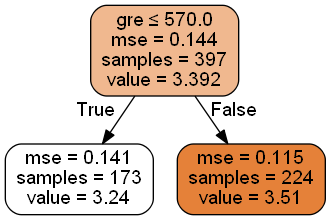

In [22]:
# # TEMPLATE CODE
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# initialize the output file object
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

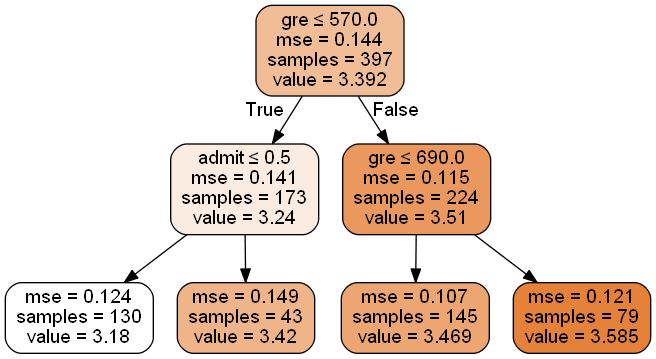

In [30]:
# A:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr2
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

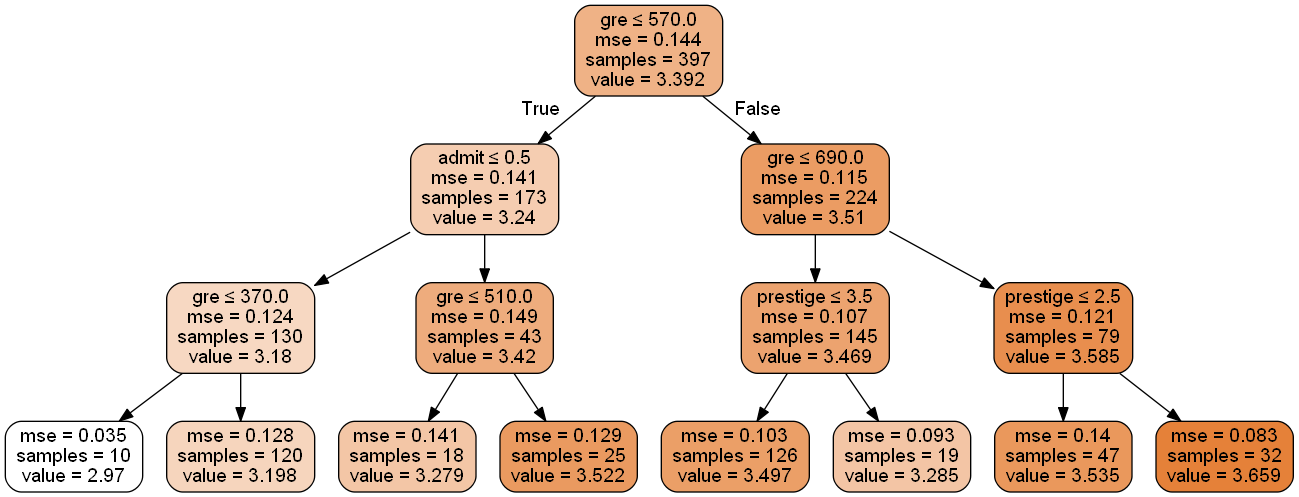

In [31]:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtr3
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

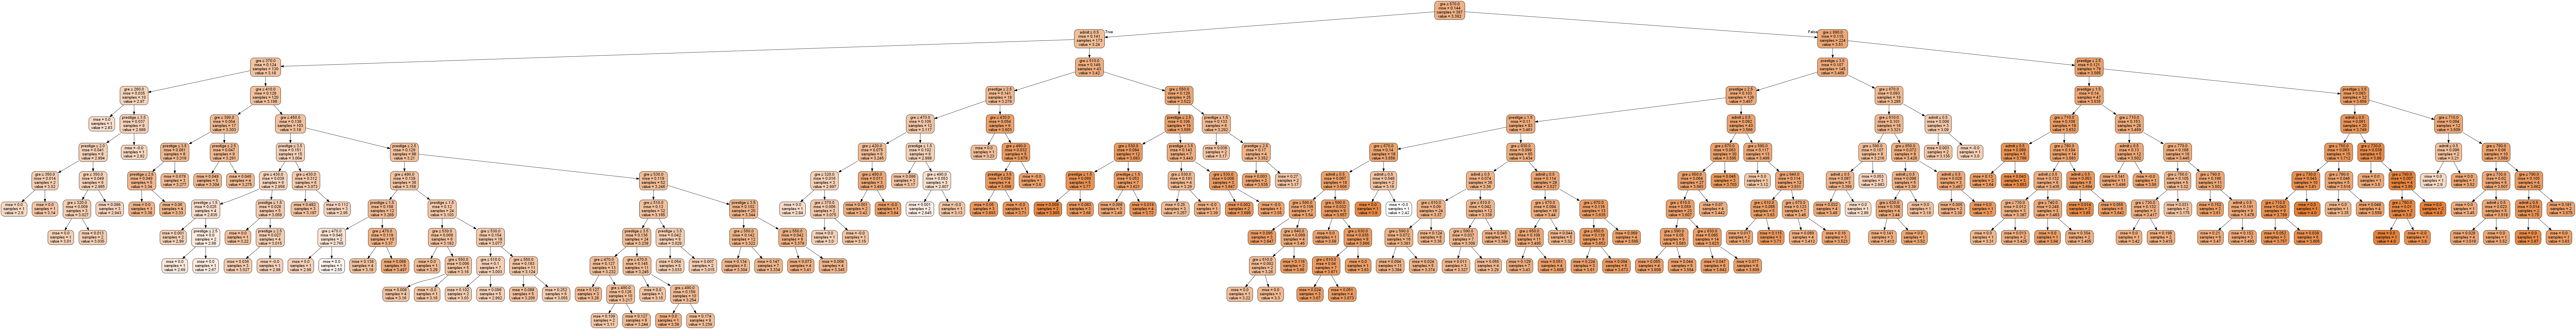

In [32]:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: max_depth=NONE
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

---

### 7. Building classification trees

With `DecisionTreeClassifier`:

1. Again build 4 models with different parameters for `max_depth`: `max_depth=1`, `max_depth=2`, `max_depth=3`, and `max_depth=None`
2. Cross-validate the accuracy scores of each of the models and compare to the logistic regression earlier.

Note that now you'll be using the classification task where we are predicting `admit`.

In [34]:
from sklearn.tree import DecisionTreeClassifier


In [35]:
# A:
dtcn = DecisionTreeClassifier(max_depth=None)
dtc1 = DecisionTreeClassifier(max_depth=1)
dtc2 = DecisionTreeClassifier(max_depth=2)
dtc3 = DecisionTreeClassifier(max_depth=3)

In [36]:
dtcn.fit(Xc, yc)
dtc1.fit(Xc, yc)
dtc2.fit(Xc, yc)
dtc3.fit(Xc, yc)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dtc_scoren = cross_val_score(dtcn, Xc, yc, cv=5)
dtc1_score = cross_val_score(dtc1, Xc, yc, cv=5)
dtc2_score = cross_val_score(dtc2, Xc, yc, cv=5)
dtc3_score = cross_val_score(dtc3, Xc, yc, cv=5)

In [43]:
print('dtc score none:', dtc_scoren.mean())
print('dtc1 score none:', dtc1_score.mean())
print('dtc2 score none:', dtc2_score.mean())
print('dtc3 score none:', dtc3_score.mean())

dtc score none: 0.601937802782
dtc1 score none: 0.675042975465
dtc2 score none: 0.707704328801
dtc3 score none: 0.715486794812


---

### 8. Visualize the classification trees

The plotting code will be the same as for regression, you just need to change the model you're using for each plot and the feature names.

The output changes somewhat from the regression tree chart. Earlier it would give the MSE of that node, but now there is a line called `value` that tells you the count of each class at that node.

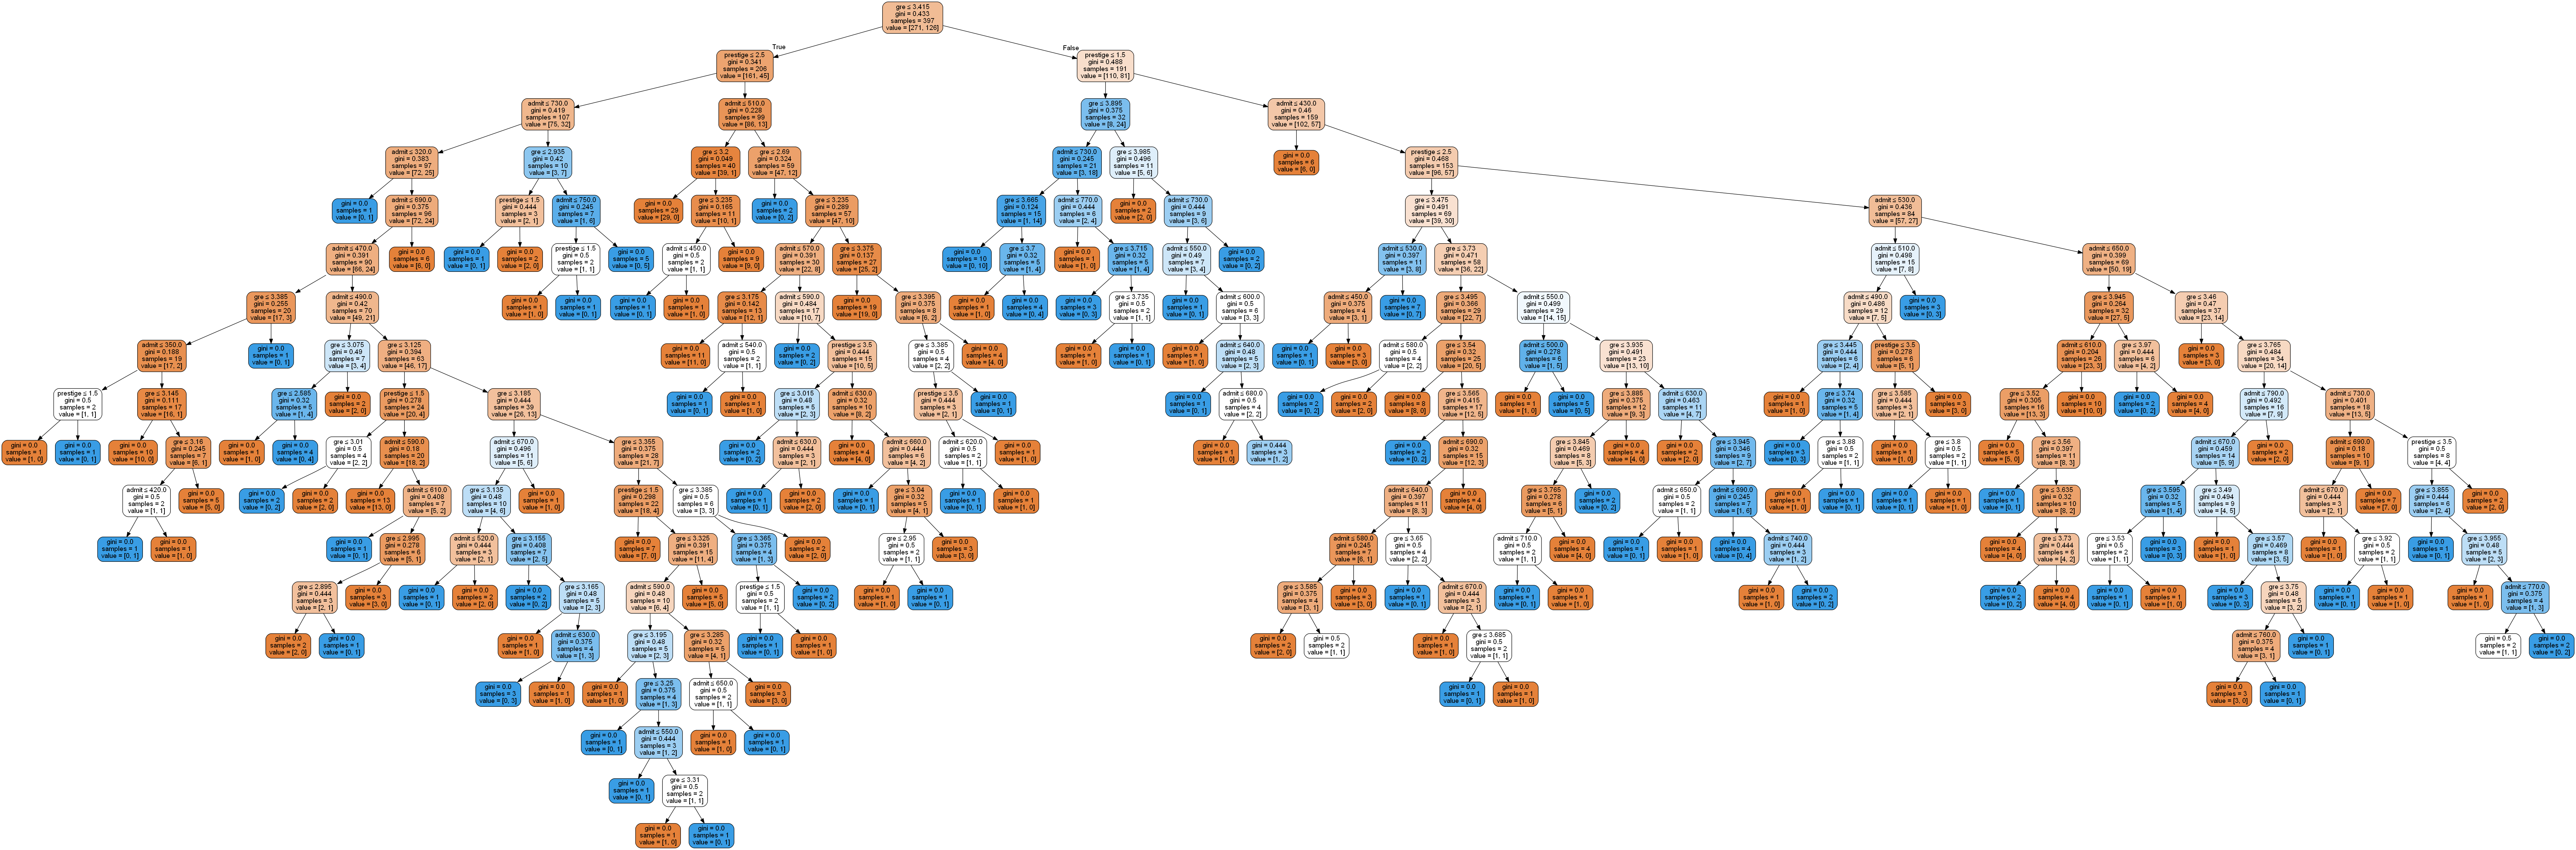

In [44]:
# A:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtc-NONE
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtcn, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

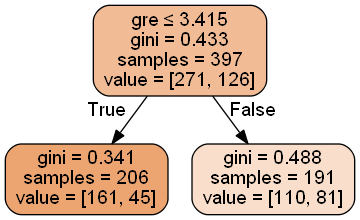

In [45]:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtc1
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

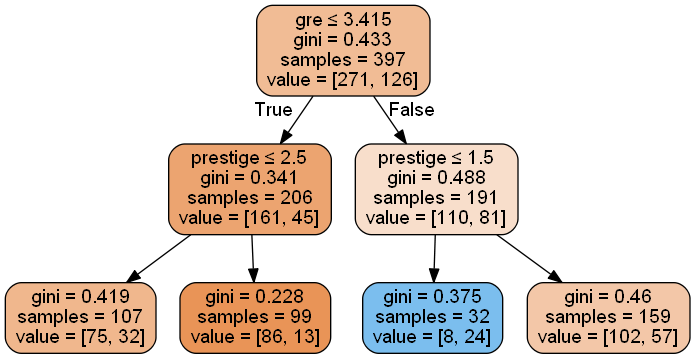

In [46]:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtc2
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

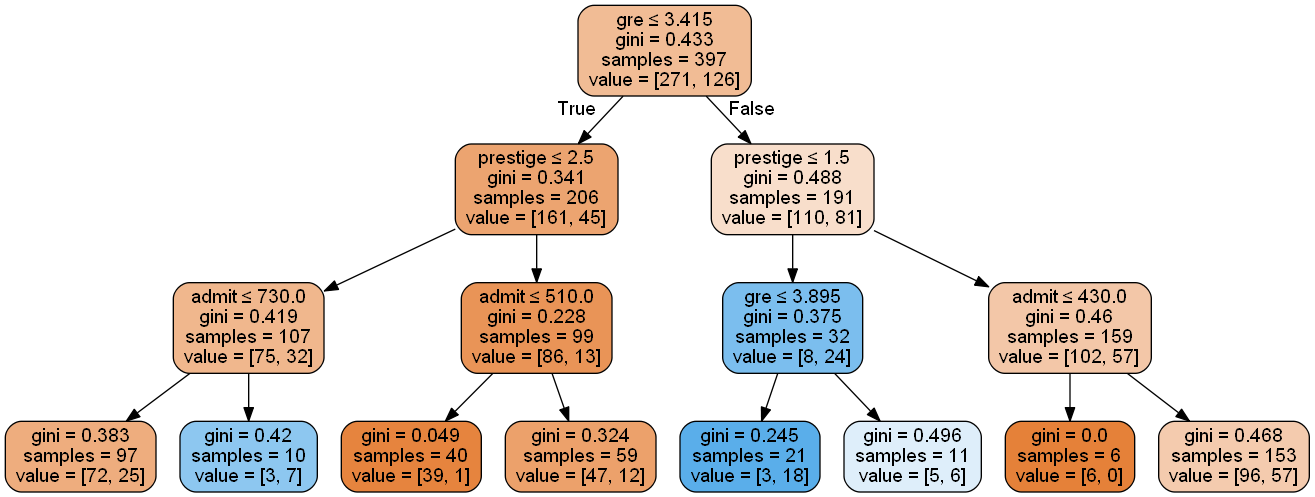

In [47]:
dot_data = StringIO() 

# my fit DecisionTreeRegressor object here is: dtc3
# for feature_names i put the columns of my Xr matrix
export_graphviz(dtc3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=Xr.columns)  

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

---

### 9. Using GridSearchCV to find the best decision tree classifier

As decision trees that are unrestricted will just end up over fitting the training data. Decision tree regression and classification models in sklearn offer a variety of ways to "pre-prune" (by restricting the how many times the tree can branch and what it can use).

Measure           | What it does
------------------|-------------
max_depth         | How many nodes deep can the decision tree go?
max_features      | Is there a cut off to the number of features to use?
max_leaf_nodes    | How many leaves can be generated per node?
min_samples_leaf  | How many samples need to be included at a leaf, at a minimum?  
min_samples_split | How many samples need to be included at a node, at a minimum?

It is not always best to search over _all_ of these in a grid search, unless you have a small dataset. Many of them while not redundant are going to have very similar effects on your model's fit.

Check out the documentation here:

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

---

#### Switch over to the college stats dataset

We are going to be predicting whether or not a college is public or private. Set up your X, y variables accordingly.

In [48]:
col = pd.read_csv('./datasets/College.csv')

In [49]:
# A:
col.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [50]:
col.isnull().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [51]:
col.columns.values

array(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'], dtype=object)

In [52]:
col.head()

Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0   70        78       18.1           12    7041         60  
1   29        30       12.2           16   10527         56  
2   53        66       12.9           30    8735         54  
3   92        97        7.7           37   19016         59  
4   76        72       11.9            2   10922         15

In [53]:
X = col.iloc[:, 2:]
X.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  P.Undergrad  \
0  1660    1232     721         23         52         2885          537   
1  2186    1924     512         16         29         2683         1227   
2  1428    1097     336         22         50         1036           99   
3   417     349     137         60         89          510           63   
4   193     146      55         16         44          249          869   

   Outstate  Room.Board  Books  Personal  PhD  Terminal  S.F.Ratio  \
0      7440        3300    450      2200   70        78       18.1   
1     12280        6450    750      1500   29        30       12.2   
2     11250        3750    400      1165   53        66       12.9   
3     12960        5450    450       875   92        97        7.7   
4      7560        4120    800      1500   76        72       11.9   

   perc.alumni  Expend  Grad.Rate  
0           12    7041         60  
1           16   10527         56  
2           30    8735         54  
3           37   19016         59  
4            2   10922         15

In [55]:
y = col['Private'].map(lambda x: 1 if x == 'Yes' else 0)

In [59]:
y.unique()

array([1, 0], dtype=int64)

---

### 10. Set up and run the gridsearch on the data

In [62]:
# A:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [65]:
dtc = DecisionTreeClassifier()
param_grid = {'max_depth': [None, 1,2,3],
             'max_features': [None, 'log2', 'sqrt', 2,3,4,5],
             'max_leaf_nodes': [2,4,6,8],
             'min_samples_leaf': [2,3,4,5,10,15,20,25,30,35,50],
             'min_samples_split':[2,5,7,10,15,20,25]}


# max_depth	How many nodes deep can the decision tree go?
# max_features	Is there a cut off to the number of features to use?
# max_leaf_nodes	How many leaves can be generated per node?
# min_samples_leaf	How many samples need to be included at a leaf, at a minimum?
# min_samples_split	How many samples need to be included at a node, at a minimum?

In [66]:
dtc_gs = GridSearchCV(dtc, param_grid, cv=5, verbose=1)

In [67]:
dtc_gs.fit(X,y)

Fitting 5 folds for each of 8624 candidates, totalling 43120 fits


[Parallel(n_jobs=1)]: Done 43120 out of 43120 | elapsed:  2.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 1, 2, 3], 'max_features': [None, 'log2', 'sqrt', 2, 3, 4, 5], 'max_leaf_nodes': [2, 4, 6, 8], 'min_samples_leaf': [2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 50], 'min_samples_split': [2, 5, 7, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [69]:
print('best dtc estimator:', '\n', dtc_gs.best_estimator_)

best dtc estimator: 
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=4, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [70]:
print('best dtc score:', dtc_gs.best_score_)

best dtc score: 0.9227799227799228


In [71]:
print('best dtc params:', dtc_gs.best_params_)

best dtc params: {'max_depth': 3, 'max_features': 4, 'max_leaf_nodes': 8, 'min_samples_leaf': 3, 'min_samples_split': 10}


---

### 11. Print out the "feature importances"

The model has an attribute called `.feature_importances_` which can tell us which features were most important vs. others. It ranges from 0 to 1, with 1 being the most important.

An easy way to think about the feature importance is how much that particular variable was used to make decisions. Really though, it also takes into account how much that feature contributed to splitting up the class or reducing the variance.

A feature with higher feature importance reduced the criterion (impurity) more than the other features.

Below, show the feature importances for each variable predicting private vs. not, sorted by most important feature to least.

In [81]:
# 
best_features = dtc_gs.best_estimator_.feature_importances_

In [82]:
best_features = pd.DataFrame({'features':best_features,
                             'Columns': X.columns})

In [89]:
best_features.sort_values('features', ascending=False, inplace=True)

In [91]:
best_features.head()

Columns  features
5   F.Undergrad  0.463929
15       Expend  0.232454
2        Enroll  0.215358
7      Outstate  0.068841
13    S.F.Ratio  0.019418